


**Problem Statemtent**

We are provided with historical sales data for 45 Retail
 stores located in different regions. Each store contains a number of departments, and we are tasked with predicting the department-wide sales for each store.

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
plt.style.use('bmh')
%matplotlib inline

**Dataset**

In [60]:
train=pd.read_csv("/content/ train.csv")
test=pd.read_csv("/content/ test.csv")

In [61]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [62]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105207 entries, 0 to 105206
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         105207 non-null  int64  
 1   Dept          105207 non-null  int64  
 2   Date          105207 non-null  object 
 3   Weekly_Sales  105207 non-null  float64
 4   IsHoliday     105206 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47063 entries, 0 to 47062
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      47063 non-null  int64 
 1   Dept       47063 non-null  int64 
 2   Date       47062 non-null  object
 3   IsHoliday  47062 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


**changing datatype to datetime format**

In [65]:
# changing datatype to datetime format
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [66]:
# Data Exploratory
train['Month']=train['Date'].dt.month
train['Year']=train['Date'].dt.year
train['Dayofweek']=train['Date'].dt.dayofweek

In [67]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [68]:
# data Exploratory
test['Month']=test['Date'].dt.month
test['Year']=test['Date'].dt.year
test['Dayofweek']=test['Date'].dt.dayofweek

In [69]:
test.head()

,Store,Dept,Date,IsHoliday,Month,Year,Dayofweek
0,1,1,2012-11-02,False,11.0,2012.0,4.0
1,1,1,2012-11-09,False,11.0,2012.0,4.0
2,1,1,2012-11-16,False,11.0,2012.0,4.0
3,1,1,2012-11-23,True,11.0,2012.0,4.0
4,1,1,2012-11-30,False,11.0,2012.0,4.0


In [70]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [71]:
# extract out the time-series
sales=train.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    13473200.49
2010-02-12    13488107.75
2010-02-19    13066040.07
2010-02-26    11929754.25
2010-03-05    12521923.06
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly_Sales')

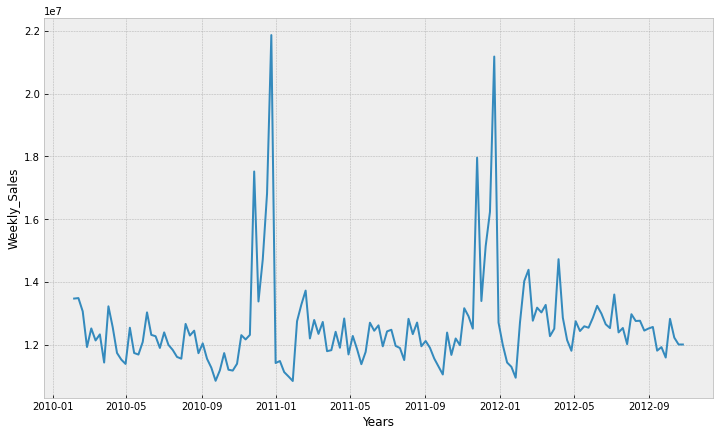

In [72]:
plt.figure(figsize=(12, 7))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

In [73]:
sales_mean=sales.rolling(window=12).mean().round(4)
sales_std=sales.rolling(window=12).std().round(4)
print(sales_mean,sales_std)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.236110e+07
2012-10-05    1.239716e+07
2012-10-12    1.237162e+07
2012-10-19    1.237077e+07
2012-10-26    1.229039e+07
Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-05            NaN
2010-02-12            NaN
2010-02-19            NaN
2010-02-26            NaN
2010-03-05            NaN
                 ...     
2012-09-28    426029.7204
2012-10-05    446979.0465
2012-10-12    447068.6403
2012-10-19    447803.8093
2012-10-26    414843.8244
Name: Weekly_Sales, Length: 143, dtype: float64


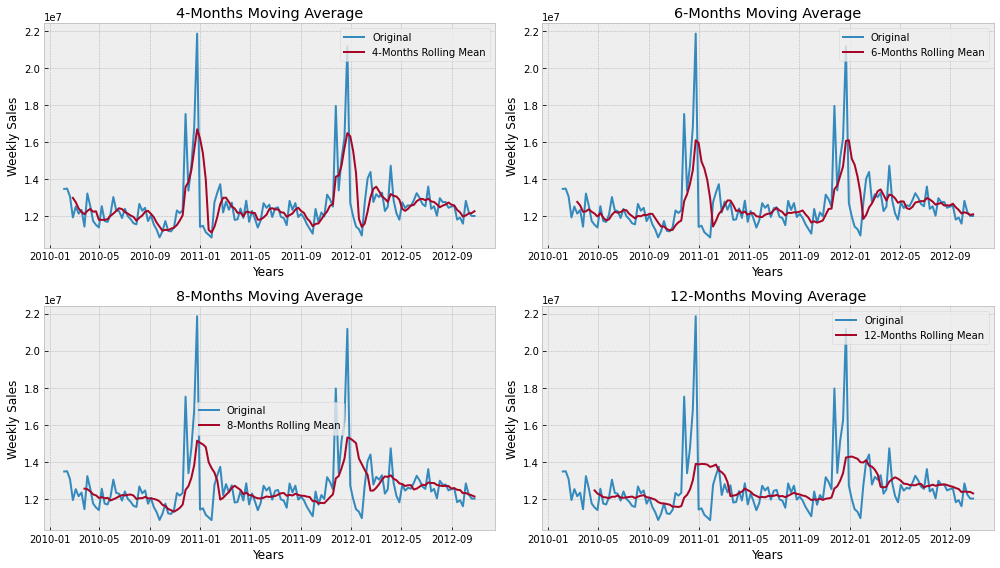

In [74]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a more wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

Let's plot the rolling mean and standard deviation on window of 12 months.

Step 1.2: Seasonality – Time Series Decomposition
The first thing to do is to see how weekly sales vary on a month basis. We will plot a stacked annual plot to observe seasonality in our data.


In [75]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
Date,,,,,,,
2010-02-05,1,1,24924.50,False,2,2010,4
2010-02-12,1,1,46039.49,True,2,2010,4
2010-02-19,1,1,41595.55,False,2,2010,4
2010-02-26,1,1,19403.54,False,2,2010,4
2010-03-05,1,1,21827.90,False,3,2010,4


In [76]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,15131.958764,15427.742188
2,17267.232489,17661.752600,18085.241570
3,16208.070629,16801.820663,17433.024828
4,16354.626144,16539.390428,17469.510495
5,16483.060199,16040.635656,17252.854943
6,17054.037624,16977.011413,17616.631403
7,16328.980423,16676.705084,17301.304538
8,16976.149026,17036.624810,17323.675729
9,15623.065275,15749.923236,16272.587911


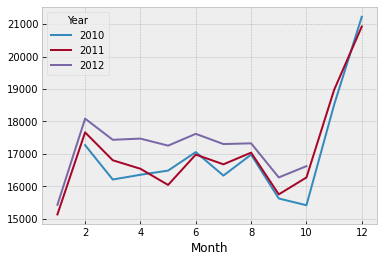

In [77]:
monthly_sales.plot()

Important Inferences
June,November and December are the peak months for weekly sales and the variance and the mean value in June,November and December are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a decreasing trend in the beginning of the year and increases towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

Step 1.3: Irregular Remainder – Time Series Decomposition

In [78]:
decomposition = sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)

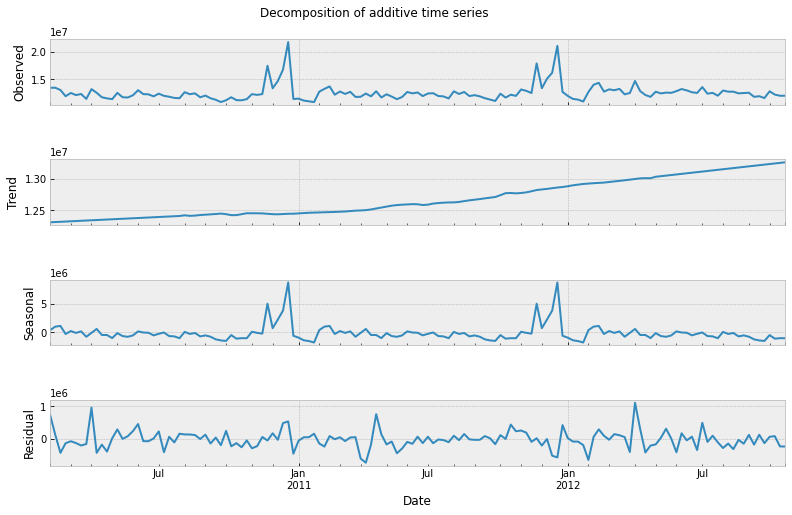

In [79]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [80]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular
decomp_output

,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
2010-02-05,13473200.49,1.231379e+07,4.141143e+05,745296.983668,3.800505e+18
2010-02-12,13488107.75,1.231774e+07,1.031727e+06,138638.558020,1.761894e+18
2010-02-19,13066040.07,1.232170e+07,1.157006e+06,-412661.711764,-5.883020e+18
2010-02-26,11929754.25,1.232565e+07,-2.756916e+05,-120202.846130,4.084587e+17
2010-03-05,12521923.06,1.232960e+07,2.515137e+05,-59192.482420,-1.835596e+17
...,...,...,...,...,...
2012-09-28,11595363.96,1.321811e+07,-1.505907e+06,-116838.385355,2.325697e+18
2012-10-05,12827947.60,1.322718e+07,-4.749728e+05,75739.217117,-4.758355e+17
2012-10-12,12229703.81,1.323625e+07,-1.101970e+06,95420.754365,-1.391802e+18


Timeseries Forecasting using FBProphet

In [81]:
#!conda  install -c conda-forge fbprophet --yes
!pip install prophet
#import prophet #you need to install fbprophet using pip install
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
train=train.groupby('Date')[['Weekly_Sales']].sum()


In [83]:
train['ds'] = train.index

In [84]:
train.head()

,Weekly_Sales,ds
Date,,
2010-02-05,13473200.49,2010-02-05
2010-02-12,13488107.75,2010-02-12
2010-02-19,13066040.07,2010-02-19
2010-02-26,11929754.25,2010-02-26
2010-03-05,12521923.06,2010-03-05


In [85]:
train = train[['ds', 'Weekly_Sales']].rename(columns={'ds': 'ds', 'Weekly_Sales': 'y'})

In [86]:
sales_model = Prophet(seasonality_mode='additive',interval_width=0.95)
sales_model.fit(train)

05:40:36 - cmdstanpy - INFO - Chain [1] start processing
05:40:37 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
sales_forecast = sales_model.make_future_dataframe(periods=36, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)

In [88]:
sales_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.226606e+07,1.113966e+07,1.485352e+07,1.226606e+07,1.226606e+07,7.275756e+05,7.275756e+05,7.275756e+05,7.275756e+05,7.275756e+05,7.275756e+05,0.0,0.0,0.0,1.299364e+07
1,2010-02-12,1.227137e+07,1.170030e+07,1.515500e+07,1.227137e+07,1.227137e+07,1.047150e+06,1.047150e+06,1.047150e+06,1.047150e+06,1.047150e+06,1.047150e+06,0.0,0.0,0.0,1.331852e+07
2,2010-02-19,1.227668e+07,1.106930e+07,1.467465e+07,1.227668e+07,1.227668e+07,6.266295e+05,6.266295e+05,6.266295e+05,6.266295e+05,6.266295e+05,6.266295e+05,0.0,0.0,0.0,1.290331e+07
3,2010-02-26,1.228199e+07,1.063600e+07,1.438512e+07,1.228199e+07,1.228199e+07,1.564977e+05,1.564977e+05,1.564977e+05,1.564977e+05,1.564977e+05,1.564977e+05,0.0,0.0,0.0,1.243849e+07
4,2010-03-05,1.228730e+07,1.040449e+07,1.410209e+07,1.228730e+07,1.228730e+07,-1.995608e+04,-1.995608e+04,-1.995608e+04,-1.995608e+04,-1.995608e+04,-1.995608e+04,0.0,0.0,0.0,1.226735e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2015-06-01,1.405503e+07,1.175601e+07,1.568224e+07,1.399023e+07,1.412067e+07,-2.157695e+05,-2.157695e+05,-2.157695e+05,-2.157695e+05,-2.157695e+05,-2.157695e+05,0.0,0.0,0.0,1.383927e+07
175,2015-07-01,1.408413e+07,1.219582e+07,1.566323e+07,1.401643e+07,1.415283e+07,-1.778994e+05,-1.778994e+05,-1.778994e+05,-1.778994e+05,-1.778994e+05,-1.778994e+05,0.0,0.0,0.0,1.390623e+07
176,2015-08-01,1.411420e+07,1.188658e+07,1.558567e+07,1.404373e+07,1.418597e+07,-4.068272e+05,-4.068272e+05,-4.068272e+05,-4.068272e+05,-4.068272e+05,-4.068272e+05,0.0,0.0,0.0,1.370737e+07
177,2015-09-01,1.414427e+07,1.201504e+07,1.519463e+07,1.407065e+07,1.421913e+07,-4.252793e+05,-4.252793e+05,-4.252793e+05,-4.252793e+05,-4.252793e+05,-4.252793e+05,0.0,0.0,0.0,1.371899e+07


<Figure size 1296x432 with 0 Axes>

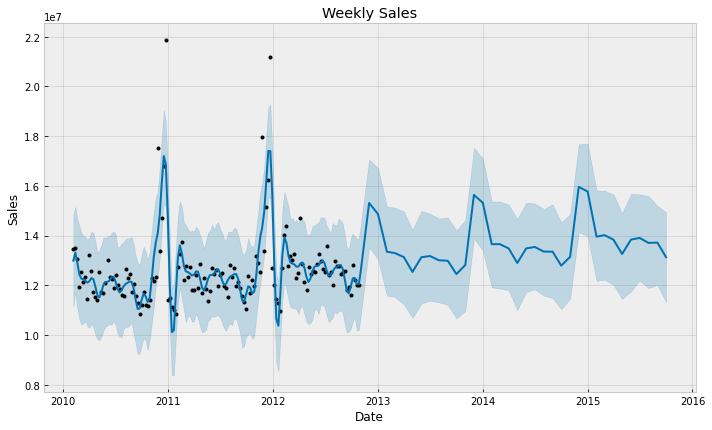

In [89]:
plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Weekly Sales');

Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

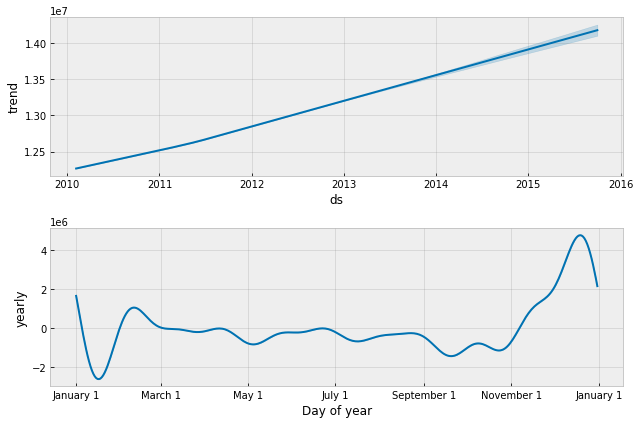

In [90]:
sales_model.plot_components(sales_forecast);

Good to see that the weekly sales have been linearly increasing over time
The worst months for weekly sales are January,October. The best months for weekly sales are June,November and December.

Stationary Data for ARIMA models
Dickey-Fuller Test

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [91]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)

(-5.462675888612098,
 2.498306982200107e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '10%': -2.578065326612056,
  '5%': -2.882721765644168},
 3987.4845962719987)

In [92]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.462676
p-value                          0.000002
#lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way less than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

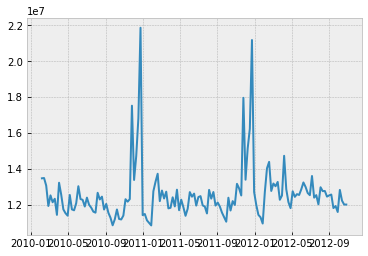

In [93]:
plt.plot(sales)

In [94]:
sales_log = np.log10(sales)

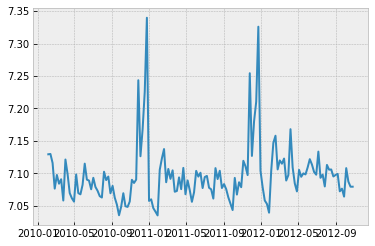

In [95]:
plt.plot(sales_log)

In [96]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.736697
p-value                          0.003626
#lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [97]:
sales.diff(1).head()

Date
2010-02-05           NaN
2010-02-12      14907.26
2010-02-19    -422067.68
2010-02-26   -1136285.82
2010-03-05     592168.81
Name: Weekly_Sales, dtype: float64

In [98]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

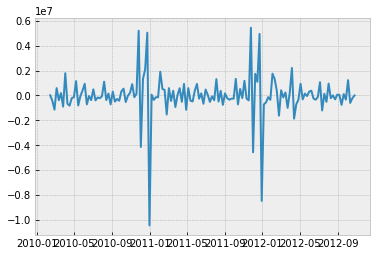

In [99]:
plt.plot(sales_diff1)

In [100]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.737139e+00
p-value                        1.086089e-11
#lags Used                     5.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


In [101]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)

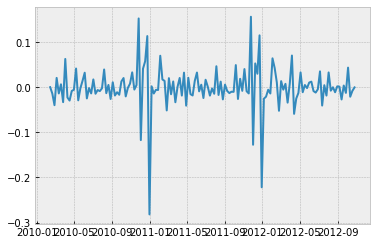

In [102]:
plt.plot(sales_log_diff1)

In [103]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                -8.007615e+00
p-value                        2.245604e-12
#lags Used                     5.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


In [104]:
sales_log_diff2 = sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [105]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.152777
p-value                          0.000011
#lags Used                      11.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


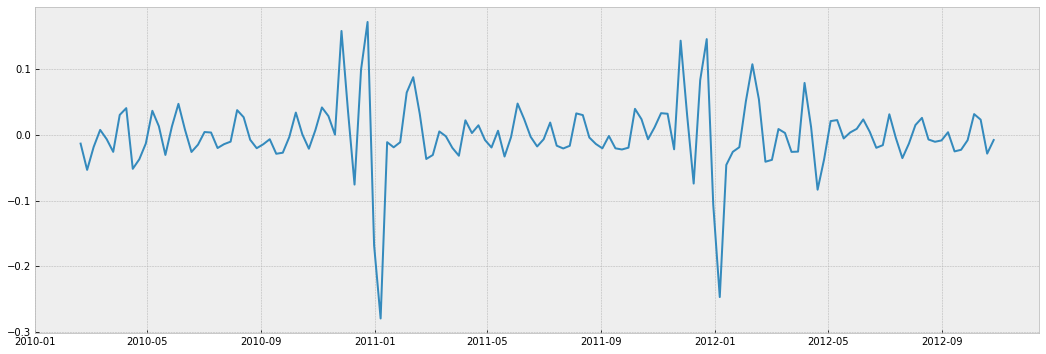

In [106]:
plt.figure(figsize=(18, 6))
plt.plot(sales_log_diff2)

The following are some of our key observations from this analysis: 1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data. 2) Seasonality: As discussed, seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

  Seasonalityt×Remaindert=YtTrendt

3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

   Remaindert=YtTrendt×Seasonalityt
The expectations from remainder component is that it should look like a white noise i.e. displays no pattern at all. However, for our series residual display some pattern with high variation on the edges of data i.e. near the beginning (2011-2012) and the end (2011-2012) of the series.


ARIMA Modeling
Step 2: Difference data to make data stationary on mean (remove trend)

Clearly the tractor sales has an upward trend for weekly sales and there is also a seasonal component that we have already analyzed.

The next thing to do is to make the series stationary by removing the upward trend through 1st order differencing of the series using the following formula:

1st Differencing (d=1) | Y′t=Yt−Yt−1


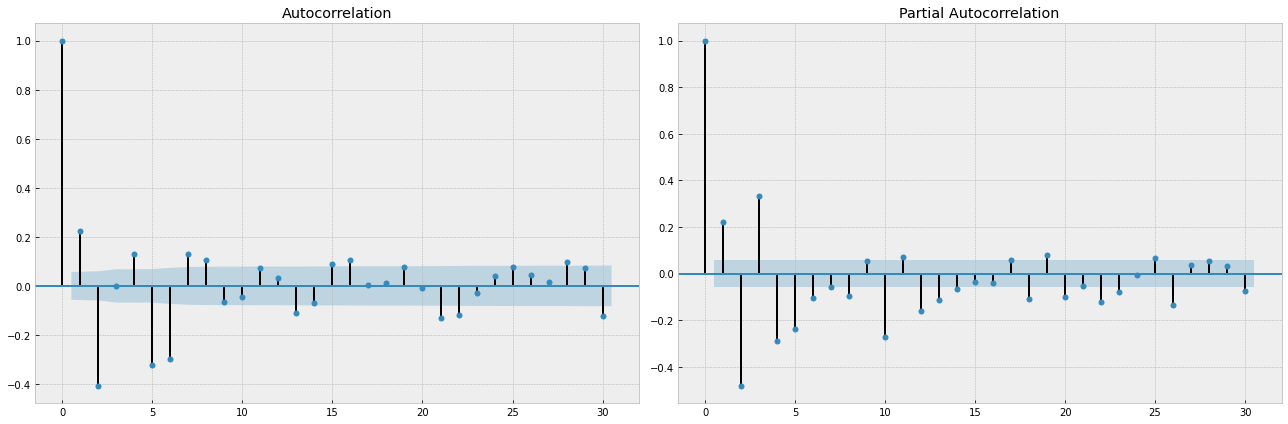

In [107]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

Step 6: Identification of best fit ARIMA ***model***

In [110]:
model = sm.tsa.statespace.SARIMAX(sales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [111]:
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                  141
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 12)   Log Likelihood                 211.662
Date:                            Thu, 07 Jul 2022   AIC                           -415.324
Time:                                    05:41:33   BIC                           -403.915
Sample:                                02-19-2010   HQIC                          -410.688
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3221      0.062     -5.223      0.000      -0.443      -0.201
ma.L1          1.0000    168.050   

Iterate the process to find the best values for p, d, q and P, D, ***Q***

In [112]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [113]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [114]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [115]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-489.2553460140724


Step 7: Predict sales on in-sample date using the best fit ARIMA model
The next step is to predict weekly sales for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [116]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [117]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                           Statespace Model Results                           
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 247.628
Date:                Thu, 07 Jul 2022   AIC                           -489.255
Time:                        05:55:59   BIC                           -480.430
Sample:                    02-05-2010   HQIC                          -485.669
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4528      0.043     10.615      0.000       0.369       0.536
ma.L1         -0.9963      0.118     -8.463      0.000      -1.227      -0.766
sigma2         0.0017      0.000      9.289      0.0

In [118]:
sales

Date
2010-02-05    13473200.49
2010-02-12    13488107.75
2010-02-19    13066040.07
2010-02-26    11929754.25
2010-03-05    12521923.06
                 ...     
2012-09-28    11595363.96
2012-10-05    12827947.60
2012-10-12    12229703.81
2012-10-19    12011135.48
2012-10-26    12010401.31
Name: Weekly_Sales, Length: 143, dtype: float64

In [119]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)

In [120]:
pred_dynamic.predicted_mean

2012-09-14    7.098370
2012-09-21    7.085998
2012-09-28    7.087792
2012-10-05    7.082052
2012-10-12    7.102122
2012-10-19    7.092616
2012-10-26    7.088969
Freq: W-FRI, dtype: float64

In [121]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [122]:
actual = sales['2012-09-14':]
actual

Date
2012-09-14    11814783.42
2012-09-21    11927596.03
2012-09-28    11595363.96
2012-10-05    12827947.60
2012-10-12    12229703.81
2012-10-19    12011135.48
2012-10-26    12010401.31
Name: Weekly_Sales, dtype: float64

In [123]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [124]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0406


In [125]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 279182495811.368
The ROOT Mean Squared Error of our forecasts is 528377.2287025321


In [126]:
np.power(10, best_results.forecast(steps=12))

2012-11-02    1.227114e+07
2012-11-09    1.239107e+07
2012-11-16    1.244576e+07
2012-11-23    1.247060e+07
2012-11-30    1.248187e+07
2012-12-07    1.248697e+07
2012-12-14    1.248928e+07
2012-12-21    1.249033e+07
2012-12-28    1.249080e+07
2013-01-04    1.249102e+07
2013-01-11    1.249112e+07
2013-01-18    1.249116e+07
Freq: W-FRI, dtype: float64

Step 8: Forecast sales using the best fit ARIMA model 

The next step is to predict weekly sales for next 3 years i.e. for 2013, 2014, and 2015 through the above model. ****

In [127]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [128]:
pred_ci_99.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.008944,7.168826
2012-11-09,7.005102,7.181115
2012-11-16,7.005338,7.184704
2012-11-23,7.005813,7.185962
2012-11-30,7.006101,7.186458


In [129]:
pred_ci_95.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.008944,7.168826
2012-11-09,7.005102,7.181115
2012-11-16,7.005338,7.184704
2012-11-23,7.005813,7.185962
2012-11-30,7.006101,7.186458


In [130]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [131]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2012-11-01,1.227114e+07,1.020808e+07,1.475116e+07
2012-12-01,1.239107e+07,1.011818e+07,1.517453e+07
2013-01-01,1.244576e+07,1.012368e+07,1.530045e+07
2013-02-01,1.247060e+07,1.013475e+07,1.534481e+07
2013-03-01,1.248187e+07,1.014148e+07,1.536235e+07


In [132]:
fc_99.head()

,lower_ci_99,upper_ci_99
2012-11-01,1.020808e+07,1.475116e+07
2012-12-01,1.011818e+07,1.517453e+07
2013-01-01,1.012368e+07,1.530045e+07
2013-02-01,1.013475e+07,1.534481e+07
2013-03-01,1.014148e+07,1.536235e+07


In [133]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,1.227114e+07,1.020808e+07,1.475116e+07,1.020808e+07,1.475116e+07
2012-12-01,1.239107e+07,1.011818e+07,1.517453e+07,1.011818e+07,1.517453e+07
2013-01-01,1.244576e+07,1.012368e+07,1.530045e+07,1.012368e+07,1.530045e+07
2013-02-01,1.247060e+07,1.013475e+07,1.534481e+07,1.013475e+07,1.534481e+07
2013-03-01,1.248187e+07,1.014148e+07,1.536235e+07,1.014148e+07,1.536235e+07


In [134]:
pd.plotting.register_matplotlib_converters()

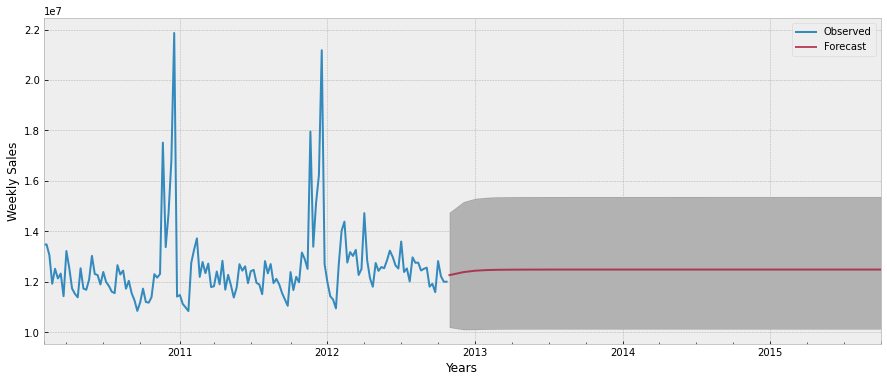

In [135]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

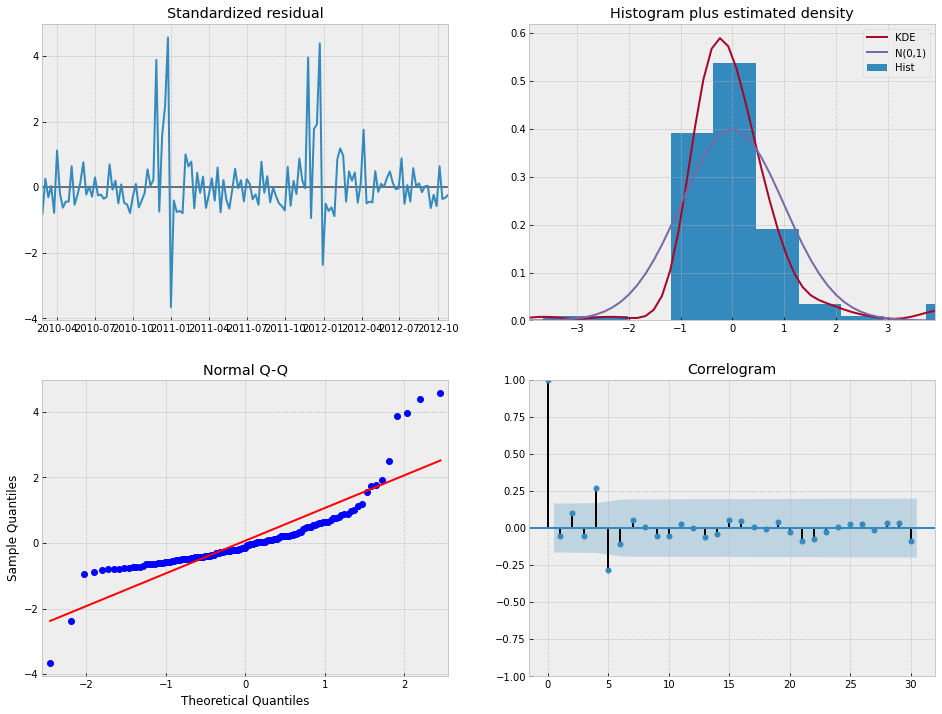

In [136]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

Single Exponential **Smoothing**

In [137]:
### single exponential smoothing/ ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
#ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
ets_fit = ets_model.fit(optimized=True)

In [138]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

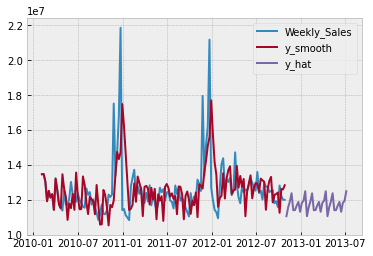

In [139]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()